### Import

In [1]:
# import os
# f = []

# all_csv = os.listdir('/Users/kirstenziman/Desktop/Desktop/DIDEC_entire_corpus/analysis_3/')
# all_csv = [x for x in all_csv if '.csv' in x and 'pp75' in x]

# for c in all_csv:
#     f.append(pd.read_csv('/Users/kirstenziman/Desktop/Desktop/DIDEC_entire_corpus/analysis_3/'+c))
    
# df = pd.concat(f)
# df[df['num_chunks']<6]

In [2]:
# f = []

# all_csv = os.listdir('/Users/kirstenziman/Desktop/Desktop/DIDEC_entire_corpus/analysis_3/LEARNING_STIM_6/')
# all_csv = [x for x in all_csv if '.csv' in x and 'pp57' in x]

# for c in all_csv:
#     f.append(pd.read_csv('/Users/kirstenziman/Desktop/Desktop/DIDEC_entire_corpus/analysis_3/LEARNING_STIM_6/'+c))
    
# df = pd.concat(f)
# df[df['num_chunks']<6]

In [3]:
#all_csv

In [29]:
import pandas as pd
import seaborn as sb
import os
import math
from matplotlib import pyplot as plt
import scipy
#from statsmodels.stats.anova import AnovaRM
import pingouin as pg
import scipy.stats as stats
import statsmodels
import numpy as np
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import binom_test
from analysis_helpers import *
from  matplotlib.ticker import FuncFormatter
# from statannotations.Annotator import Annotator
import pingouin as pg
import scipy
from scipy import stats
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

sb.set(font_scale=2)
sb.set_style("white")

### Load data for learning experiment

In [5]:
data_d = {'Subjective Ratings Over Image':[]}

for x in os.listdir('../pilot_data'):
    if x != '.DS_Store' and x!='.ipynb_checkpoints' and 'SUBJ_PILOT' in x:
        df = pd.read_csv('../pilot_data/'+x)
        df['version'] = 'Subjective Ratings Over Image'
        data_d['Subjective Ratings Over Image'].append(df)
        

In [6]:
# file_ID = ['SUBJ_PILOT.csv']      
# tag     = ['Subjective Ratings Over Image']
# path    = '../pilot_data'
# data_d  = {} 

# # for t in tag:
# #     data_d[t] = []


# for x in os.listdir(path):
    
#     if x != '.DS_Store' and x!='.ipynb_checkpoints':
        
#         df = pd.read_csv(path+'/'+x)
        
#         for a,b in zip(file_ID,tag):
            
#             if a in x:
                
#                 df['version'] = b
#                 data_d[b].append(df)

### Concatenate data

In [7]:
#data_d

In [8]:
full_data = pd.concat(data_d['Subjective Ratings Over Image'])

### Get the rows with response data

In [9]:
l = full_data['responses'].str.contains('pre')

In [10]:
m = full_data['responses'].str.contains('post')

In [11]:
full_data['resp'] = np.nan
full_data[['responses']] = full_data[['responses']].fillna('nope')
full_data.loc[full_data['responses'].str.contains('post-'), 'resp']=True
full_data.loc[full_data['responses'].str.contains('pre') , 'resp']=True

### Drop Nans

In [12]:
full_data[(full_data['resp']==True)].head(n=2)

,rt,responses,question_order,trial_type,trial_index,time_elapsed,internal_node_id,ID,view_history,value,stimulus,key_press,agent,image,version,resp
15,13589.180,"{""pre-1"":1}",[0],survey-likert,15,1209963,0.0-15.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,NaN,Subjective Ratings Over Image,True
16,5079.575,"{""pre-2"":2}",[0],survey-likert,16,1215043,0.0-16.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,NaN,Subjective Ratings Over Image,True


In [13]:
good = full_data[(full_data['resp']==True) & ~(full_data['trial_index'].isin([15, 16, 17, 18]))]#.head(n=2)
good.head(n=2)

,rt,responses,question_order,trial_type,trial_index,time_elapsed,internal_node_id,ID,view_history,value,stimulus,key_press,agent,image,version,resp
24,5755.01,"{""pre-1"":2}",[0],survey-likert,24,1242095,0.0-24.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,NaN,Subjective Ratings Over Image,True
25,6016.42,"{""pre-2"":0}",[0],survey-likert,25,1248113,0.0-25.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,NaN,Subjective Ratings Over Image,True


In [14]:
2800/(5*140)

4.0

### Obtain all images

In [15]:
li = list(full_data['image'].dropna())
len(li)

4200

In [16]:
2800/700

4.0

### Assign images to response trials

In [17]:
image_list = [[x]*4 for x in li]

In [18]:
unnest = [item for sublist in image_list for item in sublist]

In [19]:
good['image'] = unnest

### Label images - veridical v scrambled

In [20]:
good['Type'] = np.nan
good.loc[good['image'].str.contains('scramble'),  'Type']='Scrambled'
good.loc[good['image'].str.contains('veridical'), 'Type']='Veridical'

### Pull out ratings responses (as ints)

In [21]:
p = [int(f[-2]) for f in list(good['responses'])]

In [22]:
good['Rating'] = p

### Pull out Question Numbers (as ints)

In [23]:
v = [f[6:8] for f in list(good['responses'])]
good['Question'] = v

### Prep data for plotting

In [24]:
grp = good.groupby(['ID','Question', 'Type'], as_index=False).mean()


In [25]:
grp.head()

,ID,Question,Type,rt,trial_index,time_elapsed,value,stimulus,key_press,Rating
0,1ng3vcfh,-5,Scrambled,3481.288929,525.428571,2.249565e+06,NaN,NaN,NaN,1.314286
1,1ng3vcfh,-5,Veridical,3798.732929,513.571429,2.222746e+06,NaN,NaN,NaN,0.957143
2,1ng3vcfh,"1""",Scrambled,6947.362143,522.428571,2.239730e+06,NaN,NaN,NaN,1.585714
3,1ng3vcfh,"1""",Veridical,7115.227214,510.571429,2.211767e+06,NaN,NaN,NaN,1.942857
4,1ng3vcfh,"2""",Scrambled,4161.349214,523.428571,2.243892e+06,NaN,NaN,NaN,1.657143


In [26]:
#good['image_short'] good['image']

### Plot results

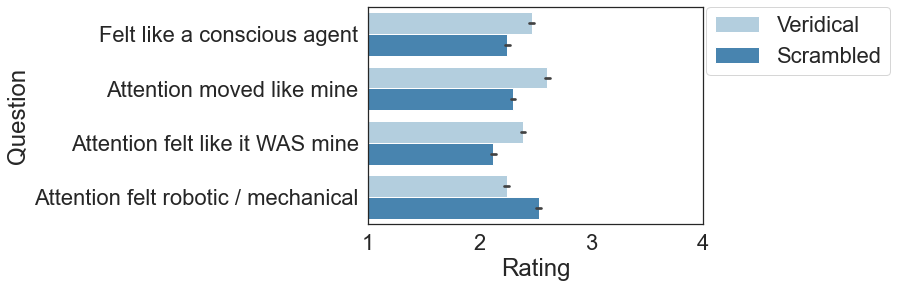

In [32]:
g = sb.barplot(hue='Type', y='Question', x='Rating', data=good, palette='Blues',errorbar='se')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
g.set_xticklabels(['1','2','3','4'])
g.set_xlim(0,3)

g.set_yticklabels(['Felt like a conscious agent',
                   'Attention moved like mine',
                   'Attention felt like it WAS mine',
                  'Attention felt robotic / mechanical'])

plt.savefig('subjective_plot.pdf',bbox_inches='tight')
plt.show()

In [29]:
len(grp['ID'].unique())

19

In [30]:
sb.set(font_scale=2)
sb.set_style("white")

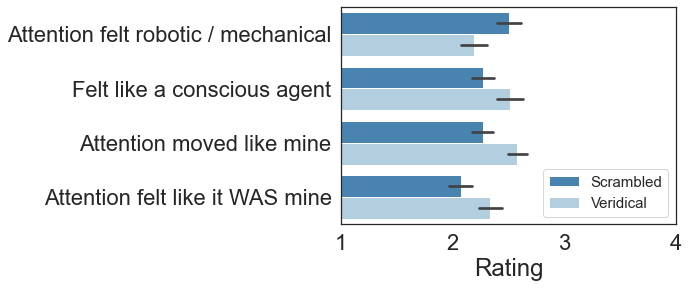

In [38]:
g = sb.barplot(hue='Type', y='Question', x='Rating', data=grp, palette='Blues_r',errorbar='se')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
g.set_xticklabels(['1','2','3','4'])
g.set_ylabel("")

g.set_xlim(0,3)
g.set_yticklabels(['Attention felt robotic / mechanical','Felt like a conscious agent',
                   'Attention moved like mine','Attention felt like it WAS mine'])

#place legend in center right of plot
g.legend(loc='lower right',fontsize='15')

plt.savefig('subjective_plot.pdf', bbox_inches='tight')
#plt.legend(title='Team', fontsize='10', title_fontsize='14')

### look for each subject what the trend looks like

[Text(0, 0, 'Felt like a conscious agent'),
 Text(0, 1, 'Attention moved like mine'),
 Text(0, 2, 'Attention felt like it WAS mine'),
 Text(0, 3, 'Attention felt robotic / mechanical')]

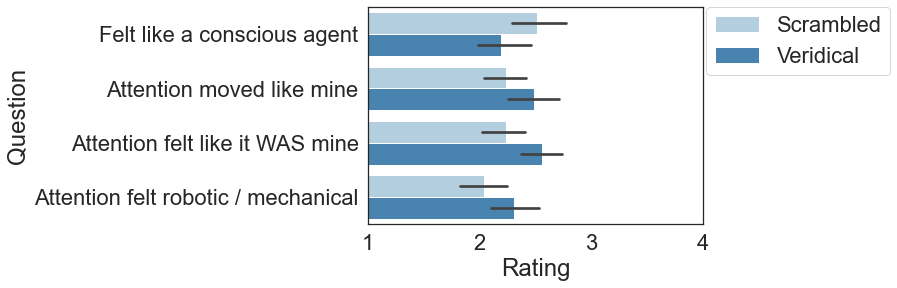

In [95]:
g = sb.barplot(hue='Type', y='Question', x='Rating', data=grp, palette='Blues')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
g.set_xticklabels(['1','2','3','4'])
g.set_xlim(0,3)
g.set_yticklabels(['Felt like a conscious agent',
                   'Attention moved like mine','Attention felt like it WAS mine',
                  'Attention felt robotic / mechanical'])

### Exclude bad guy

[Text(0, 0, 'Felt like a conscious agent'),
 Text(0, 1, 'Attention moved like mine'),
 Text(0, 2, 'Attention felt like it WAS mine'),
 Text(0, 3, 'Attention felt robotic / mechanical')]

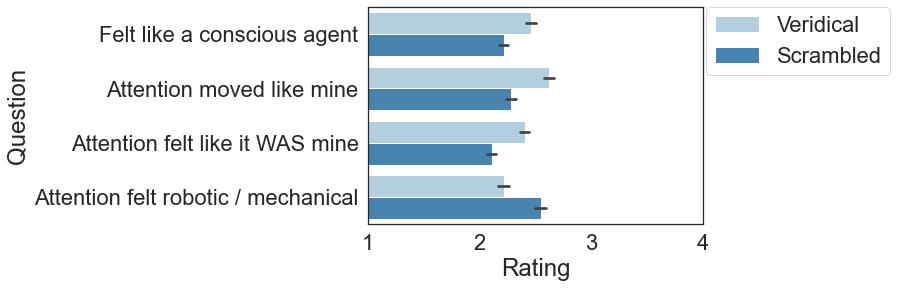

In [96]:
g = sb.barplot(hue='Type', y='Question', x='Rating', data=good[~(good['ID']=='x6wt9dsu')], palette='Blues')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
g.set_xticklabels(['1','2','3','4'])
g.set_xlim(0,3)
g.set_yticklabels(['Felt like a conscious agent',
                   'Attention moved like mine','Attention felt like it WAS mine',
                  'Attention felt robotic / mechanical'])

### Plot for each subject

felt conscious


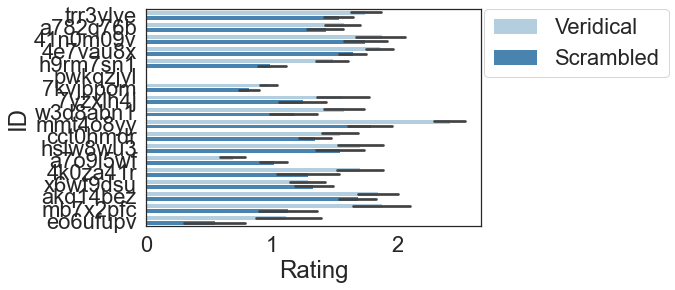

attention moved like mine


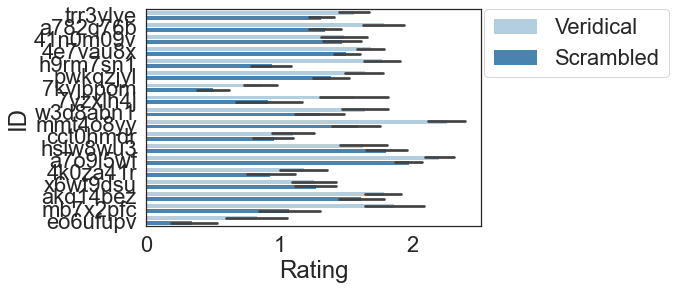

attention felt like it WAS mine


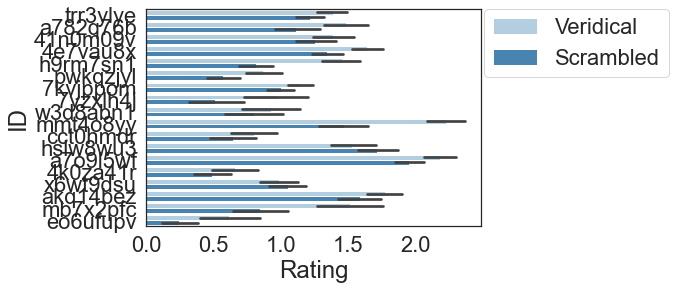

attention felt robotic


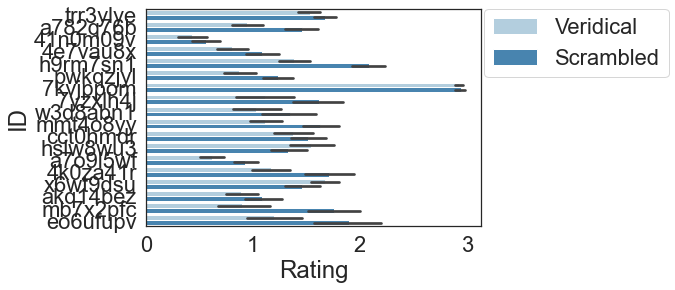

In [97]:
for q,question in zip(['felt conscious','attention moved like mine',
                      'attention felt like it WAS mine',
                      'attention felt robotic'],good['Question'].unique()):
    
    print(q)
    g = sb.barplot(hue='Type', y='ID', x='Rating', data=good[good['Question']==question], palette='Blues')
    plt.legend(bbox_to_anchor=(1.01, 1),
               borderaxespad=0)
    #g.set_xticklabels(['1','2','3','4'])
    #g.set_xlim(0,3)
    #g.set_yticklabels(['Felt like a conscious agent',
#                        'Attention moved like mine','Attention felt like it WAS mine',
#                       'Attention felt robotic / mechanical'])
    plt.show()

# for x in good['ID'].unique():
    
#     g = sb.barplot(hue='Type', y='Question', x='Rating', data=good[good['ID']==x], palette='Blues')
#     plt.legend(bbox_to_anchor=(1.01, 1),
#                borderaxespad=0)
#     g.set_xticklabels(['1','2','3','4'])
#     g.set_xlim(0,3)
#     g.set_yticklabels(['Felt like a conscious agent',
#                        'Attention moved like mine','Attention felt like it WAS mine',
#                       'Attention felt robotic / mechanical'])
#     plt.show()

In [98]:
good['Abridged Image'] = list([x[:-44] for x in list(good['image'])])

In [99]:
good['Abridged Image']

24       STIM_SET_1_REAL/713135.bmp_pp54_L2
25       STIM_SET_1_REAL/713135.bmp_pp54_L2
26       STIM_SET_1_REAL/713135.bmp_pp54_L2
27       STIM_SET_1_REAL/713135.bmp_pp54_L2
31       STIM_SET_1_REAL/713796.bmp_pp84_L3
                       ...                 
1005    STIM_SET_1_REAL/1591954.bmp_pp62_L2
1009    STIM_SET_1_REAL/1159784.bmp_pp73_L3
1010    STIM_SET_1_REAL/1159784.bmp_pp73_L3
1011    STIM_SET_1_REAL/1159784.bmp_pp73_L3
1012    STIM_SET_1_REAL/1159784.bmp_pp73_L3
Name: Abridged Image, Length: 15680, dtype: object

In [100]:
good.head(n=2)

,rt,responses,question_order,trial_type,trial_index,time_elapsed,internal_node_id,ID,view_history,value,stimulus,key_press,agent,image,version,resp,Type,Rating,Question,Abridged Image
24,5755.01,"{""pre-1"":2}",[0],survey-likert,24,1242095,0.0-24.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/713135.bmp_pp54_L2_V1.0_veridi...,Subjective Ratings Over Image,True,Veridical,2,"1""",STIM_SET_1_REAL/713135.bmp_pp54_L2
25,6016.42,"{""pre-2"":0}",[0],survey-likert,25,1248113,0.0-25.0,trr3ylye,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/713135.bmp_pp54_L2_V1.0_veridi...,Subjective Ratings Over Image,True,Veridical,0,"2""",STIM_SET_1_REAL/713135.bmp_pp54_L2


In [101]:
veridical_t = good[good['Type']=='Veridical'].sort_values('Abridged Image')

In [102]:
veridical_t.head(n=2)

,rt,responses,question_order,trial_type,trial_index,time_elapsed,internal_node_id,ID,view_history,value,stimulus,key_press,agent,image,version,resp,Type,Rating,Question,Abridged Image
698,1080.04,"{""pre-2"":1}",[0],survey-likert,698,1664659,0.0-698.0,hslw8wu3,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/1159440.bmp_pp98_L1_V1.0_verid...,Subjective Ratings Over Image,True,Veridical,1,"2""",STIM_SET_1_REAL/1159440.bmp_pp98_L1
458,1279.63,"{""pre-2"":2}",[0],survey-likert,458,1177152,0.0-458.0,a7o9l5wf,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/1159440.bmp_pp98_L1_V1.0_verid...,Subjective Ratings Over Image,True,Veridical,2,"2""",STIM_SET_1_REAL/1159440.bmp_pp98_L1


In [103]:
scrambled_t = good[good['Type']=='Scrambled'].sort_values('Abridged Image')

In [104]:
scrambled_t.head(n=2)

,rt,responses,question_order,trial_type,trial_index,time_elapsed,internal_node_id,ID,view_history,value,stimulus,key_press,agent,image,version,resp,Type,Rating,Question,Abridged Image
949,1178.700,"{""post-5"":1}",[0],survey-likert,949,2801490,0.0-949.0,a782q76b,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/1159440.bmp_pp98_L1_V1.0_scram...,Subjective Ratings Over Image,True,Scrambled,1,-5,STIM_SET_1_REAL/1159440.bmp_pp98_L1
416,2302.825,"{""post-5"":2}",[0],survey-likert,416,1442155,0.0-416.0,eo6ufupv,NaN,NaN,NaN,NaN,NaN,STIM_SET_1_REAL/1159440.bmp_pp98_L1_V1.0_scram...,Subjective Ratings Over Image,True,Scrambled,2,-5,STIM_SET_1_REAL/1159440.bmp_pp98_L1


### Pairwise t-tests

In [143]:
for question in scrambled_t['responses'].unique():
    print(question+' paired t_test : ')
    print(scipy.stats.ttest_rel(list(scrambled_t[scrambled_t['responses']=='question']['key_press']),
                          list(veridical_t[veridical_t['responses']=='question']['key_press'])))
    print()
    

{"pre-1":0} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"post-5":3} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-3":1} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-1":2} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-2":2} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-2":0} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-1":1} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-3":0} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"post-5":2} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"post-5":0} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-3":2} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-2":1} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"post-5":1} paired t_test : 
Ttest_relResult(statistic=nan, pvalue=nan)

{"pre-1":3} paired t_test : 
Ttest_relResult(st

# Graveyard

### Obtain df rows 

2820

### Obtain image list

In [13]:
li = list(full_data['image'].dropna())
len(li)

700

### Get df rows with desired responses

In [14]:
responses = full_data.iloc[i]

In [15]:
responses['responses'].unique() #['trial_index'].unique()

array(['{"pre-1":2}', '{"pre-2":1}', '{"pre-3":2}', '{"pre-1":1}',
       '{"pre-2":0}', '{"pre-3":0}', '{"pre-3":1}', '{"pre-2":2}',
       '{"pre-1":0}', '{"post-5":3}', '{"post-5":2}', '{"post-5":1}'],
      dtype=object)

### Examine data

In [16]:
responses.shape

(2820, 16)

In [17]:
full_data['responses'].unique()

array(['{"Experimenter":["Confirmed subject\'s identity (ID card)","Confirmed normal or corrected-to-normal vision","Obtained consent (signature and date)","Checked the test room lighting","Checked computer screen lighting","Checked distance from screen to chin rest (50cm)","Cleaned and adjusted chin rest","Counterbalanced the order of the tasks","Opened the experiment in Firefox","Made the experiment full screen","Encouraged subject to silence phone, put away distractors, etc."]}',
       'nope', '{"Age":3,"Sex":0,"Gender":0}', '{"pre-1":2}',
       '{"pre-2":1}', '{"pre-3":2}', '{"post-5":3}', '{"pre-1":1}',
       '{"pre-2":0}', '{"pre-3":0}', '{"pre-3":1}', '{"post-5":2}',
       '{"pre-2":2}', '{"pre-1":0}', '{"post-5":1}',
       '{"Experimenter_end":["Printed ID# 7kvjppom on consent form","Given subject SONA credit or payment","Given the subject debrief form"]}',
       '{"Age":1,"Sex":1,"Gender":1}', '{"pre-2":3}', '{"post-5":0}',
       '{"pre-3":3}', '{"pre-1":3}',
       '{"